# Clean Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
import pickle
import numpy as np

# file = open("/content/drive/My Drive/Dataset/wine_quality/wine.data", "r")
# data = file.read()
# file.close()

with open("/content/drive/My Drive/Dataset/wine quality/winequality-red.csv", "r") as f:
    lines = f.readlines()
    # print(lines)
f.close()
print(lines)


# with open("/content/sample_data/winequality-red.csv", "r") as f:
#     lines = f.readlines()
#     # print(lines)
# f.close()
# print(lines)

# with open("/content/drive/My Drive/Dataset/wine quality/winequality-white.csv", "r") as f:
#     lines1 = f.readlines()
#     # print(lines)
# f.close()
# print(lines1)

# with open("/content/sample_data/winequality-white.csv", "r") as f:
#     lines1 = f.readlines()
#     # print(lines)
# f.close()
# # print(lines1)

# print(np.shape(n1))

n1 = len(lines)
# n2 = 25

# data = np.zeros((n1 + n2 - 2, 12))
# data = np.zeros((n1 + n2, 12))

data = np.zeros((n1 - 1, 12))

m = 0
for i in range(1,n1):
  # print(lines[i])
  x = lines[i].strip().split(";")
  # print(x)
  data[m,:] = [np.around(float(x[i]),3) for i in range(len(x))]
  m += 1

print(m)
# for i in range(1,n2):
#   # print(lines1[i])
#   # exit(0)
#   x = lines1[i].strip().split(";")
#   # print(x)
#   data[m,:] = [np.around(float(x[i]),3) for i in range(len(x))]
#   m += 1

# print(m)

# lines = lines.append(lines1)
# print(lines)
# lines = np.array(lines).reshape()



X = data[:,0:11]
Y = data[:,11]


# proc_X = (X - np.average(X, axis=0)) / np.std(X, axis=0)


# print(data)
del data

['"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n', '7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n', '7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5\n', '7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5\n', '11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6\n', '7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5\n', '7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5\n', '7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5\n', '7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7\n', '7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7\n', '7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n', '6.7;0.58;0.08;1.8;0.097;15;65;0.9959;3.28;0.54;9.2;5\n', '7.5;0.5;0.36;6.1;0.071;17;102;0.9978;3.35;0.8;10.5;5\n', '5.6;0.615;0;1.6;0.089;16;59;0.9943;3.58;0.52;9.9;5\n', '7.8;0.61;0.29;1.6;0.114;9;29;0.9974;3.26;1.56;9.1;5\n', '8.9;0.62;0.18;3.8;0.176;52;145;0.9986;3

# Build Environment

In [ ]:
import numpy as np
from random import shuffle
import itertools

class Wine_env(object):
  
  # Global init
  num_dims = 0
  num_arms = 0
  sigma = 1.0

  #sigma = 0.0 # No noise for Active

  num_trials = 20
  T = 2000
  delta = 0.1

  def Wine_env1(self, seed, X, Y):
          
    np.random.seed(seed)
    N, d = np.shape(X)
    self.num_dims = d
    self.num_arms = X.shape[0]
          
    # print(X)
    
    
    np.random.shuffle(X)
    
    self.X = X
    # print(self.X)
    self.Y = Y
    # print(self.Y)
   

  

## Pass processed data to the environment
#if __name__ == "__main__":
env = Wine_env()
env.Wine_env1(16, X, Y)

# Common Functions

In [ ]:
def residuals(theta, inds_pulled):
      '''
      function to be optimized
      '''
      # y = self.env.x - theta
      # funcvals_at_theta = np.exp(-1.0*y**2)*np.cos(4.0*np.pi*y)
      # mus_inds_pulled = funcvals_at_theta[self.inds_pulled]
      #print(theta)


      X_of_pulled_arms = [env.X[ind] for ind in inds_pulled]
      mus_inds_pulled = reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

def find_least_square(theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.random.randn(env.num_dims)
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln
    
def reward_func(theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        mu_list.append(np.dot(theta,x))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])

# Find $\theta^*$

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp
from scipy.optimize import least_squares
from scipy.optimize import leastsq

#from environment.LinBandit_env import LinBandit_env

class Uniform_Sampling(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = 10000
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.sample_complexity = []
        self.sigma = env.sigma
        
        
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.armerr = np.zeros((self.num_trials, self.T//self.rec))
        
        
        
        self.p_unif = [1.0/self.num_arms for i in range(self.num_arms)]
        
    
    def residuals(self, theta):
      '''
      function to be optimized
      '''
      # y = self.env.x - theta
      # funcvals_at_theta = np.exp(-1.0*y**2)*np.cos(4.0*np.pi*y)
      # mus_inds_pulled = funcvals_at_theta[self.inds_pulled]
      #print(theta)


      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.random.randn(self.env.num_dims)
      print("rd: ",rand_start)
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      # self.opt_soln = leastsq(self.residuals, rand_start)  # second arg is initial guess
      
      print("opt sol: ", self.opt_soln)

      return self.opt_soln
    
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        mu_list.append(np.dot(theta,x))
        # mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])
      

    
    
    def run_Uniform_Sampling(self):

        self.error = np.zeros((self.num_trials, self.T))  

        for tr in range(1):

            self.seed = tr 
            np.random.seed(tr)
            print(tr, end=' ')
            
            
            '''
            env = self.env.LinBandit_env1(tr, self.num_dims, self.num_arms)
            self.init_MaxMin_Sampling(env)
            '''
            A = np.eye(self.num_dims)
            b = np.zeros(self.num_dims)
            #print(p_mm,v, num_arms, num_samples)
            np.random.seed(tr)
            # maxmin_samples = np.random.choice(self.num_arms, size=self.T, p=self.p_mm/np.sum(self.p_mm))
            # maxmin_R = self.X[maxmin_samples] @ self.theta_star + self.sigma * np.random.randn(len(maxmin_samples))

            samples = []
            R = []
            
            rewards = np.zeros((2, self.num_arms))
            err = np.zeros((2, self.T//self.rec))

            self.inds_pulled = []
            self.X_sampled = []
            self.rewards = []

            # x = np.random.choice(range(0, self.num_arms), self.num_arms)
            x = [i for i in range(self.num_arms)]
            print(x)
            for i in range(0,len(x)):
              self.inds_pulled.append(x[i])
              self.X_sampled.append(self.X[self.inds_pulled[i]])
              self.rewards.append(self.env.Y[self.inds_pulled[i]])

            theta_hat = self.find_least_square()["x"]

            print(theta_hat)

            # self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
            # self.inds_pulled = []
            # self.rewards = []

            

            # for s in range(self.T):
                
            #     arm = np.random.choice(self.num_arms, size = 1, p = self.p_unif)
            #     # print(arm[0])
            #     # reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()
            #     reward = self.env.Y[arm[0]]

            #     self.inds_pulled.append(arm[0])
            #     self.rewards.append(reward)
            #     # print(arm, reward)
            #     samples.append(arm[0])
            #     R.append(reward)

            #     rewards[0, samples[s]] += R[s]
            #     rewards[1, samples[s]] += 1
            #     A += np.outer(self.X[samples[s]], self.X[samples[s]])

            #     # print(R[s], self.X[samples[s]])
            #     b += R[s] * self.X[samples[s]]
        
                
                
            #     if s%30 == 0:
            #       theta_hat = self.find_least_square()["x"]

                

            #     err[0, s//self.rec] = 0
            #     #maxmin_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
            #     self.error[tr][s] = 0
                    
            #     if s%100 == 0 and s >= 100:
            #       print(s, theta_hat, err[0][s])

            #     if s%1000 == 0:
            #         print(s)
            
            
            self.theta_star = theta_hat



if __name__ == "__main__":
    

    
    env_unif = Uniform_Sampling(env)
    print(env_unif.p_unif)
    env_unif.run_Uniform_Sampling()
    env.theta_star = env_unif.theta_star




[0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.00062539

## Sanity Check

In [ ]:
Y_est = env.X@env.theta_star
print(np.shape(Y_est))
error_norm = np.linalg.norm(Y_est - env.Y)
print(error_norm)
print("norm theta: ", np.linalg.norm(env.theta_star)) 
print("Y_est: ", np.linalg.norm(Y_est))
print("Y: ", np.linalg.norm(env.Y))

(1599,)
32.20793904932713
norm theta:  5.427692954222683
Y_est:  225.38111869053012
Y:  227.67081499392933


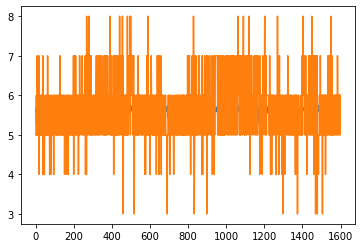

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Y_est)
plt.plot(Y)

## Save $\theta^*$

In [ ]:
import pickle

print(env.theta_star)

file = open('theta_star_lin1', 'wb')
# dump information to that file
pickle.dump(env.theta_star, file)
# close the file
file.close()

[-1.13391182e-02 -5.11723847e-02  6.25822360e-02  1.32230227e-02
 -1.01172880e+00 -1.97211147e-03  5.45826460e-05  5.32969341e+00
  1.41371876e-01  6.16051913e-02  2.95482189e-04]


## Load $\theta^*$

In [ ]:
import pickle
# open a file, where you stored the pickled data
file = open('theta_star_lin1', 'rb')
# dump information to that file
env.theta_star = pickle.load(file)
# close the file
file.close()

print(env.theta_star)


[-1.13687324e-02 -5.12320301e-02  6.31301553e-02  1.32428083e-02
 -1.01346322e+00 -1.97001471e-03  5.19454745e-05  5.33118710e+00
  1.41888333e-01  6.19103018e-02]


# Generalized Chernoff

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp
from scipy.optimize import least_squares
import pickle

#from environment.LinBandit_env import LinBandit_env

class Chern_Sampling(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.sample_complexity = []
        self.sigma = env.sigma
        
        self.theta_star = env.theta_star
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.armerr = np.zeros((self.num_trials, self.T//self.rec))
        # self.mm_T = self.T * np.ones(self.num_trials)
        
        # self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
        # self.p_mm = [1.0/self.num_arms for i in range(self.num_arms)]
        
    
    def prop_load(self, ):
      file = open('chern_lin_prop2', 'rb')
      # dump information to that file
      self.p_mm = pickle.load(file)
      # close the file
      file.close()
      return self.p_mm
        
    def max_kmin_eig(self, rows_of_arms, k=1, verbose=False):
        
        p = cp.Variable(rows_of_arms.shape[0], nonneg=True)
        
        prob = cp.Problem(
            cp.Maximize(cp.lambda_sum_smallest(rows_of_arms.T @ cp.diag(p) @ rows_of_arms, k)),
            [cp.sum(p) ==1]
        )
        
        try:
            obj_value = prob.solve(solver='CVXOPT', kktsolver=cp.ROBUST_KKTSOLVER, verbose=verbose)
        except Exception as inst:
            print(inst)
            return False
        
        return p.value, prob.value
    
    
      

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      


      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.random.randn(self.env.num_dims)
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln
    
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        # mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
        mu_list.append((np.dot(theta,x)))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])
    
    def run_Chern_Sampling(self):

        self.error = np.zeros((self.num_trials, self.T))  

        for tr in range(self.num_trials):

            self.seed = tr 
            np.random.seed(tr)
            print(tr, end=' ')
            
            
            A = np.eye(self.num_dims)
            b = np.zeros(self.num_dims)
            #print(p_mm,v, num_arms, num_samples)
            np.random.seed(tr)
            
            samples = []
            R = []
           
            rewards = np.zeros((2, self.num_arms))
            err = np.zeros((2, self.T//self.rec))

            #self.p_mm = [1.0/self.num_arms for i in range(0,self.num_arms)]
            self.inds_pulled = []
            self.rewards = []

            # self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
            self.p_mm = self.prop_load()

            self.inds_pulled = []
            self.rewards = []

            # theta_hat = np.random.randn(self.num_dims)
            for s in range(0, self.T):
                
                arm = np.random.choice(self.num_arms, size = 1, p = self.p_mm)
                # print(arm)
                # reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()
                reward = np.dot(self.X[arm], self.theta_star) + self.sigma * np.random.randn()
                # reward = self.env.Y[arm[0]]

                self.inds_pulled.append(arm[0])
                self.rewards.append(reward[0])
                # print(arm, reward)
                samples.append(arm[0])
                R.append(reward[0])

                rewards[0, samples[s]] += R[s]
                rewards[1, samples[s]] += 1
                A += np.outer(self.X[samples[s]], self.X[samples[s]])
                b += R[s] * self.X[samples[s]]
        
                # print(s)
                
                if s%30 == 0:
                  theta_hat = self.find_least_square()["x"]

                

                err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                #maxmin_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                    
                if s%100 == 0 and s >= 100:
                  print(s, theta_hat, self.theta_star, err[0][s])

                if s%1000 == 0:
                    print(s)
                    
            self.esterr[tr] = err[0]
            self.armerr[tr] = err[1]
            self.sample_complexity.append(samples)



if __name__ == "__main__":
    

    
    gen_chern = Chern_Sampling(env)
    # print(gen_chern.p_mm)
    gen_chern.run_Chern_Sampling()




0 0
100 [-1.02459418e-01 -2.40312823e-01 -2.96576289e-01  5.35402406e-03
 -6.71113621e-01  2.75701904e-03 -3.79087632e-03  6.41235720e+00
 -2.69827191e-01  1.01417453e+00  7.03264692e-02] [-1.13391182e-02 -5.11723847e-02  6.25822360e-02  1.32230227e-02
 -1.01172880e+00 -1.97211147e-03  5.45826460e-05  5.32969341e+00
  1.41371876e-01  6.16051913e-02  2.95482189e-04] 1.594593320549059
200 [-5.93951453e-02 -1.20733423e-01  4.46495217e-01 -1.20649878e-02
 -1.98649212e+00  1.48001640e-02 -3.08652112e-03  5.54653585e+00
  7.97409011e-02  8.63885754e-01 -1.41207249e-02] [-1.13391182e-02 -5.11723847e-02  6.25822360e-02  1.32230227e-02
 -1.01172880e+00 -1.97211147e-03  5.45826460e-05  5.32969341e+00
  1.41371876e-01  6.16051913e-02  2.95482189e-04] 1.3417572210982933
300 [-4.74140387e-02  3.83703666e-01  6.56772204e-01 -2.72214342e-02
 -1.39946042e+00  2.11262587e-02 -6.66983057e-03  5.78178355e+00
 -7.02606522e-02  5.22667299e-01 -3.20177016e-03] [-1.13391182e-02 -5.11723847e-02  6.25822360e-0

KeyboardInterrupt: ignored

[2.79172841e-10 2.83422953e-10 3.57757739e-10 ... 3.58890850e-10
 3.05401230e-10 3.63445175e-10]
1599


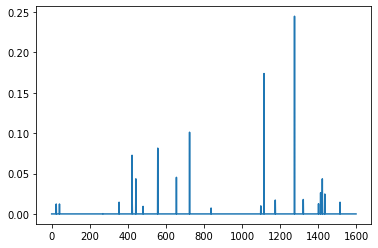

In [ ]:
print(gen_chern.p_mm)
print(len(gen_chern.p_mm))

import matplotlib.pyplot as plt

plt.plot(gen_chern.p_mm)

## Save Chern Prop

In [ ]:
import pickle

file = open('chern_lin_prop2', 'wb')
# dump information to that file
pickle.dump(gen_chern.p_mm, file)
# close the file
file.close()

## Load Chernoff Prop

In [ ]:
import pickle
# open a file, where you stored the pickled data
file = open('chern_lin_prop2', 'rb')
# dump information to that file
gen_chern.p_mm = pickle.load(file)
# close the file
file.close()

print(gen_chern.p_mm)

[2.79172841e-10 2.83422953e-10 3.57757739e-10 ... 3.58890850e-10
 3.05401230e-10 3.63445175e-10]


# Generalized Chernoff (Exploration)

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp
from scipy.optimize import least_squares
import pickle

#from environment.LinBandit_env import LinBandit_env

class Chern_Sampling_Exploration(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.sample_complexity = []
        self.sigma = env.sigma
        
        self.theta_star = env.theta_star
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.armerr = np.zeros((self.num_trials, self.T//self.rec))
        self.epsilon = 0
        # self.mm_T = self.T * np.ones(self.num_trials)
        
        # self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
        # self.p_mm = [1.0/self.num_arms for i in range(self.num_arms)]
        
    
    def prop_load(self, ):
      file = open('chern_lin_prop2', 'rb')
      # dump information to that file
      self.p_mm = pickle.load(file)
      # close the file
      file.close()
      return self.p_mm
        
    def max_kmin_eig(self, rows_of_arms, k=1, verbose=False):
        
        p = cp.Variable(rows_of_arms.shape[0], nonneg=True)
        
        prob = cp.Problem(
            cp.Maximize(cp.lambda_sum_smallest(rows_of_arms.T @ cp.diag(p) @ rows_of_arms, k)),
            [cp.sum(p) ==1]
        )
        
        try:
            obj_value = prob.solve(solver='CVXOPT', kktsolver=cp.ROBUST_KKTSOLVER, verbose=verbose)
        except Exception as inst:
            print(inst)
            return False
        
        return p.value, prob.value
    
    
      

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      


      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.random.randn(self.env.num_dims)
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln
    
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        # mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
        mu_list.append((np.dot(theta,x)))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])
    
    def run_Chern_Sampling_Exploration(self):

        self.error = np.zeros((self.num_trials, self.T))  

        for tr in range(self.num_trials):

            self.seed = tr 
            np.random.seed(tr)
            print(tr, end=' ')
            
            
            A = np.eye(self.num_dims)
            b = np.zeros(self.num_dims)
            #print(p_mm,v, num_arms, num_samples)
            np.random.seed(tr)
            
            samples = []
            R = []
           
            rewards = np.zeros((2, self.num_arms))
            err = np.zeros((2, self.T//self.rec))

            #self.p_mm = [1.0/self.num_arms for i in range(0,self.num_arms)]
            self.inds_pulled = []
            self.rewards = []

            # self.p_mm, self.v = self.max_kmin_eig(self.X, verbose=False)
            self.p_mm = self.prop_load()

            self.inds_pulled = []
            self.rewards = []

            # theta_hat = np.random.randn(self.num_dims)
            for s in range(0, self.T):
                
                b = np.random.uniform(0,1)
                self.epsilon = 1.0/((s+1)**1.5)
                # self.epsilon = 1.0/np.sqrt(s+1)
                # self.epsilon = 0.05
                if b < self.epsilon:
                  arm = [np.random.randint(0, self.num_arms - 1)]
                else:
                  arm = np.random.choice(self.num_arms, size = 1, p = self.p_mm)
                # print(arm)
                # reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()
                reward = np.dot(self.X[arm], self.theta_star) + self.sigma * np.random.randn()
                # reward = self.env.Y[arm[0]]

                self.inds_pulled.append(arm[0])
                self.rewards.append(reward[0])
                # print(arm, reward)
                samples.append(arm[0])
                R.append(reward[0])

                rewards[0, samples[s]] += R[s]
                rewards[1, samples[s]] += 1
                A += np.outer(self.X[samples[s]], self.X[samples[s]])
                b += R[s] * self.X[samples[s]]
        
                # print(s)
                
                if s%30 == 0:
                  theta_hat = self.find_least_square()["x"]

                

                err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                #maxmin_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                    
                if s%100 == 0 and s >= 100:
                  print(s, theta_hat, self.theta_star, err[0][s])

                if s%1000 == 0:
                    print(s)
                    
            self.esterr[tr] = err[0]
            self.armerr[tr] = err[1]
            self.sample_complexity.append(samples)



if __name__ == "__main__":
    

    
    gen_chern_e = Chern_Sampling_Exploration(env)
    # print(gen_chern.p_mm)
    gen_chern_e.run_Chern_Sampling_Exploration()




0 0
100 [-8.94038028e-02  1.81437439e-01  5.88554779e-01 -6.03972164e-02
 -2.36077257e+00  5.08553740e-03 -5.79748757e-03  8.02114297e+00
 -1.01227338e+00  2.64506864e-01  1.82598756e-01] [-1.13391182e-02 -5.11723847e-02  6.25822360e-02  1.32230227e-02
 -1.01172880e+00 -1.97211147e-03  5.45826460e-05  5.32969341e+00
  1.41371876e-01  6.16051913e-02  2.95482189e-04] 3.288080486790417
200 [-2.50429486e-03 -2.88034698e-01  1.93007547e-01 -7.28493797e-02
 -1.35207882e+00  3.57579727e-03  1.13947516e-04  6.46936069e+00
  4.46106568e-03 -5.96270884e-01 -7.67737062e-03] [-1.13391182e-02 -5.11723847e-02  6.25822360e-02  1.32230227e-02
 -1.01172880e+00 -1.97211147e-03  5.45826460e-05  5.32969341e+00
  1.41371876e-01  6.16051913e-02  2.95482189e-04] 1.3953209390880674
300 [ 3.70059380e-02 -9.23450156e-02 -3.29671654e-01 -1.29974732e-01
 -1.61132704e+00 -2.56659963e-03 -1.47345472e-04  5.56595357e+00
  3.63810569e-03  1.87755173e-01  2.32165697e-02] [-1.13391182e-02 -5.11723847e-02  6.25822360e-0

KeyboardInterrupt: ignored

# Uniform Sampling

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp
from scipy.optimize import least_squares

#from environment.LinBandit_env import LinBandit_env

class Uniform_Sampling(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.sample_complexity = []
        self.sigma = env.sigma
        
        self.theta_star = env.theta_star
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.armerr = np.zeros((self.num_trials, self.T//self.rec))
        # self.T = self.T * np.ones(self.num_trials)
        
        
        self.p_unif = [1.0/self.num_arms for i in range(self.num_arms)]
        
    
    
      

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      


      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.random.randn(self.env.num_dims)
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln
    
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        # mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
        mu_list.append((np.dot(theta,x)))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])
      
    
    def run_Uniform_Sampling(self):

        self.error = np.zeros((self.num_trials, self.T))  

        for tr in range(self.num_trials):

            self.seed = tr 
            np.random.seed(tr)
            print(tr, end=' ')
            
            
            '''
            env = self.env.LinBandit_env1(tr, self.num_dims, self.num_arms)
            self.init_MaxMin_Sampling(env)
            '''
            A = np.eye(self.num_dims)
            b = np.zeros(self.num_dims)
            #print(p_mm,v, num_arms, num_samples)
            np.random.seed(tr)
            # maxmin_samples = np.random.choice(self.num_arms, size=self.T, p=self.p_mm/np.sum(self.p_mm))
            # maxmin_R = self.X[maxmin_samples] @ self.theta_star + self.sigma * np.random.randn(len(maxmin_samples))

            samples = []
            R = []
           
            rewards = np.zeros((2, self.num_arms))
            err = np.zeros((2, self.T//self.rec))

            self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
            self.inds_pulled = []
            self.rewards = []

            


            self.inds_pulled = []
            self.rewards = []
            for s in range(0, self.T):
                
                arm = np.random.choice(self.num_arms, size = 1, p = self.p_unif)
                # print(arm)
                reward = [np.dot(self.X[arm[0]], self.theta_star) + self.sigma * np.random.randn()]
                # reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()
                # print(reward)
                # reward = self.env.Y[arm[0]]

                self.inds_pulled.append(arm[0])
                self.rewards.append(reward[0])
                # print(arm, reward)
                samples.append(arm[0])
                R.append(reward)

                rewards[0, samples[s]] += R[s]
                rewards[1, samples[s]] += 1
                A += np.outer(self.X[samples[s]], self.X[samples[s]])
                b += R[s] * self.X[samples[s]]
        
                
                
                if s%30 == 0:
                  theta_hat = self.find_least_square()["x"]

                

                err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                #maxmin_err[1, s//self.rec] = not (self.best_arm == np.argmax(self.X @ theta_hat))
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                    
                if s%100 == 0 and s >= 100:
                  print(s, theta_hat, self.theta_star, err[0][s])

                if s%1000 == 0:
                    print(s)
                    
            self.esterr[tr] = err[0]
            self.armerr[tr] = err[1]
            self.sample_complexity.append(samples)



if __name__ == "__main__":
    

    
    unif = Uniform_Sampling(env)
    print(unif.p_unif)
    unif.run_Uniform_Sampling()




[0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.0006253908692933083, 0.00062539

KeyboardInterrupt: ignored

# Ortho Greedy

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp

#from environment.LinBandit_env import LinBandit_env

class Ortho_Greedy_Sampling(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.sample_complexity = []
        self.sigma = env.sigma
        self.theta_star = env.theta_star
        
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.armerr = np.zeros((self.num_trials, self.T//self.rec))
        # self.T = self.T * np.ones(self.num_trials)
        
        self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
        
    
    
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        mu_list.append(np.dot(theta,x))
        # mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      

      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      #rand_start = np.array([0.6, 0.6, 0.6])
      rand_start = np.random.randn(self.num_dims)
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln

    
    def run_Ortho_Greedy_Sampling(self):

        self.error = np.zeros((self.num_trials, self.T))  
        

        for tr in range(self.num_trials):
            print(tr, end=' ')
            self.seed = tr 
            np.random.seed(tr)
            
            
            A = np.eye(self.num_dims)
            b = np.zeros(self.num_dims)
            
            samples = []
            R = []

            self.inds_pulled = []
            self.rewards = []

            rewards = np.zeros((2, self.num_arms))
            err = np.zeros((2, self.T//self.rec))

            
            theta_hat = np.random.randn(self.num_dims)
            #print("th: ", theta_hat)
            for s in range(self.T):

                
                max_arm = np.argmax(self.X.dot(theta_hat))
                
                dot_product_list = []
                for arm in range(0,self.num_arms):
                  
                  dot_product_list.append(abs(np.dot(theta_hat,self.X[arm])))
                

                ortho_arm = np.argmin(dot_product_list)
                #print(ortho_arm)
                self.epsilon = 0.1
                num = np.random.uniform(0,1)
                
                
                if num > self.epsilon:
                  arm = ortho_arm
                else:
                  arm = np.random.choice(self.num_arms, size = 1, p = self.p_unif)[0]
                
                reward = np.dot(self.X[arm], self.theta_star) + self.sigma * np.random.randn()
                # reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()
                
                self.inds_pulled.append(arm)
                self.rewards.append(reward)

                # print(arm, reward)
                samples.append(arm)
                R.append(reward)


                rewards[0, samples[s]] += R[s]
                rewards[1, samples[s]] += 1
                A += np.outer(self.X[samples[s]], self.X[samples[s]])
                b += R[s] * self.X[samples[s]]
        
                
                if s%30 == 0:
                  theta_hat = self.find_least_square()["x"]

                err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                err[1, s//self.rec] = 0
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                   
                if s%100 == 0 and s >= 100:
                  print(s,theta_hat, self.theta_star, self.error[tr][s])

                if s%1000 == 0:
                    print(s)
                    
            self.esterr[tr] = err[0]
            self.armerr[tr] = err[1]
            self.sample_complexity.append(samples)



if __name__ == "__main__":
    
    
    ogreedy = Ortho_Greedy_Sampling(env)
    ogreedy.run_Ortho_Greedy_Sampling()


0 0


KeyboardInterrupt: ignored

# ActiveS

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp
from scipy.optimize import least_squares

#from environment.LinBandit_env import LinBandit_env

class ActiveSelect(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.sample_complexity = []
        self.sigma = env.sigma
        self.theta_star = env.theta_star
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env
        
        self.esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.armerr = np.zeros((self.num_trials, self.T//self.rec))
        # self.activeS_T = self.T * np.ones(self.num_trials)

        self.sample_complexity = []
        
        self.p_unif = [1.0/self.num_arms for i in range(0,self.num_arms)]
        
    
    
        
    def residuals(self, theta):
      '''
      function to be optimized
      '''
      
      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      
      rand_start = np.random.randn(self.env.num_dims)
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln
    
    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      #print(x_coord)
      #print(theta, X)
      # print(np.transpose(theta, x))
      mu_list = []
      for x in X:
        mu_list.append(np.dot(theta,x))
        # mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      #return 1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x[0]))))
      #return np.array([0, 1, 0])
    
    def solve_optimization(self, theta1):

      
      d = self.num_dims
      

      X_sampled = np.copy(self.env.X)

      X_sampled = X_sampled.T
      # print(np.shape(X_sampled))
      # print("X: ",X_sampled)

      IU_theta1 = np.zeros((d, d))
      #for i in range(self.m2):
      for i in range(self.num_arms):
        ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1)) ## Uncomment next two lines for GLM
        val = ext /((1.0 + ext)**2) * np.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)
        # val = np.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T) # Linear
        IU_theta1 = IU_theta1 + val
        #print('val', val)

      # IU_theta1 += 0.01*np.eye(d) # Adding a \lambda I

      

      #print('IU_theta1', IU_theta1)

      u, e, v = np.linalg.svd(IU_theta1)
      #print('u e v', u.shape, e.shape, v.shape)
      e = e.reshape(-1, 1)

      # print('e', e.shape)
      # print("e", e.T, e)

      #e = np.array([[2.35976768], [1.26244748]])
      # print("e", e.T, e)

      a = cp.Variable((self.num_arms, 1))
      c = cp.Variable((d, 1))

      # a = cp.Variable(m2)
      # c = cp.Variable(d)

      S = np.zeros((d, d))
      #for i in range(self.m2):
      for i in range(self.num_arms):
        ext = np.exp( np.matmul(X_sampled[:, i:i+1].T, theta1)) ## Uncomment next two lines for GLM
        S = S + a[i, 0] * ext /((1.0 + ext)**2) * cp.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T)
        
        # S = S + a[i, 0] * cp.matmul(X_sampled[:, i:i+1], X_sampled[:, i:i+1].T) # Linear

      # print('S.shape', S.shape)
      # print(np.shape(a))
      # print(np.shape(c))
      
      constraints = [a >= 0]
      constraints += [a <= 1]
      constraints += [cp.sum(a) == self.m2]

      for j in range(d):
        constraints += [cp.matrix_frac(v[:, j], S) <= c[j, 0]]

      # for j in range(len(constraints)):
      #   print(constraints[j])

      prob = cp.Problem(cp.Minimize(e.T @ c), constraints)

      prob.solve()

      # print("The optimal value is", prob.value)
      # print("A solution X is")
      # print(a.value)

      return a.value

    def get_gamma_bar(self, theta_hat):

      # Solve Optimization
            
      theta1 = theta_hat
      print("theta1: ", theta1)

      #self.m2 = self.m1 # len m2 < m1
      a_star = self.solve_optimization(theta1)
      # alpha = 1 - (np.power(self.m2, -1.0/6.0))
            
      #alpha = 1
      alpha = 1 - (np.power(self.T, -1.0/6.0))

      #print(a_star, np.shape(a_star))

      gamma1 = a_star/self.m2

      # print(gamma1, np.shape(gamma1))
      # print("sum: ", gamma1[0,:], np.sum(gamma1[0,:]))

      self.gamma_bar = np.zeros(self.num_arms)

      # Calculate distribution, 

      for k in range(self.num_arms):
  
        self.gamma_bar[k] += alpha*(gamma1[k]) + (1.0 - alpha)*self.p_unif[k]
        # gamma_bar[k] += abs(gamma1[k])

      self.gamma_bar = np.abs(self.gamma_bar)
      self.gamma_bar = self.gamma_bar/np.sum(self.gamma_bar)
      return self.gamma_bar

    def prop_load(self, ):
      file = open('actives_lin_prop4', 'rb')
      # dump information to that file
      self.gamma_bar = pickle.load(file)
      # close the file
      file.close()
      return self.gamma_bar

    
    def run_ActiveSelect(self):

        self.error = np.zeros((self.num_trials, self.T))  
        
        
        for tr in range(self.num_trials):
            print(tr, end=' ')
            self.seed = tr 
            np.random.seed(tr)
            
            '''
            env = self.env.LinBandit_env1(tr, self.num_dims, self.num_arms)
            self.init_MaxMin_Sampling(env)
            '''
            A = np.eye(self.num_dims)
            b = np.zeros(self.num_dims)
            
            samples = []
            R = []

            rewards = np.zeros((2, self.num_arms))
            err = np.zeros((2, self.T//self.rec))

            self.inds_pulled = []
            self.rewards = []
            ### Compute theta_star ###

            ## 1st Stage

            self.m1 = 1
            self.m2 = 1
            for s in range(self.m1):
                
                #arm = np.random.choice(self.num_arms, size = 1, p = self.p_unif)

                arm = [s]
                reward = [np.dot(self.X[arm[0]], self.theta_star) + self.sigma * np.random.randn()]
                # reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()

                # print(reward)
                self.inds_pulled.append(arm[0])
                self.rewards.append(reward[0])
                #print(arm, reward)
                samples.append(arm[0])
                R.append(reward[0])


                rewards[0, samples[s]] += R[s]
                rewards[1, samples[s]] += 1
                A += np.outer(self.X[samples[s]], self.X[samples[s]])
                b += R[s] * self.X[samples[s]]
        
                
                if s%1 == 0:
                  theta_hat = self.find_least_square()["x"]

                err[0, s//self.rec] = 0
                err[1, s//self.rec] = 0
                    
                self.error[tr][s] = 0
                   
                if s%100 == 0 and s >= 100:
                  print(theta_hat, err[0][s])

                if s%1000 == 0:
                    print(s)
            

            # self.gamma_bar = self.get_gamma_bar(theta_hat)
            self.gamma_bar = self.prop_load()

            print("2nd stage, dist: ", self.gamma_bar)

            # 2nd Stage

            # self.inds_pulled = [] # Reinitialize for 2nd stage
            # self.rewards = []
            
            for s in range(self.m1, self.T):
                
                #gamma_bar = alpha*(gamma1[s]) + (1.0 - alpha)*np.array(self.p_unif)
                

                arm = np.random.choice(self.num_arms, size = 1, p = self.gamma_bar)
                reward = np.dot(self.X[arm[0]], self.theta_star) + self.sigma * np.random.randn()

                self.inds_pulled.append(arm[0])
                self.rewards.append(reward)
                #print(arm, reward)
                samples.append(arm[0])
                R.append(reward)


                rewards[0, samples[s]] += R[s]
                rewards[1, samples[s]] += 1
                A += np.outer(self.X[samples[s]], self.X[samples[s]])
                b += R[s] * self.X[samples[s]]
        
                
                if s%30 == 0:
                  theta_hat = self.find_least_square()["x"]

                err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                err[1, s//self.rec] = 0
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                   
                if s%100 == 0 and s >= 100:
                  print(s,theta_hat, self.theta_star, self.error[tr][s])

                if s%1000 == 0:
                    print(s)
            

            theta2 = theta_hat
                    
            self.esterr[tr] = err[0]
            self.armerr[tr] = err[1]
            self.sample_complexity.append(samples)



if __name__ == "__main__":
    
    
    activeS = ActiveSelect(env)
    activeS.run_ActiveSelect()




0 0
2nd stage, dist:  [0.00021421 0.00035561 0.00021039 ... 0.00012995 0.00037079 0.00035559]
100 [-4.58420309e-02 -7.54168522e-02  4.30974324e-03  2.20636169e-02
  1.36053014e+00 -4.53930375e-03  2.63241308e-03  9.42280984e+00
 -7.56148757e-01 -1.60818954e+00 -4.28645375e-03] [-1.13391182e-02 -5.11723847e-02  6.25822360e-02  1.32230227e-02
 -1.01172880e+00 -1.97211147e-03  5.45826460e-05  5.32969341e+00
  1.41371876e-01  6.16051913e-02  2.95482189e-04] 5.0970833395842705
200 [-3.38046963e-02 -2.44028281e-01  5.56566127e-01 -3.28004567e-02
 -1.75713064e-01 -1.62483536e-02  3.44462519e-03  5.17763335e+00
  3.18508121e-01 -8.96387867e-01  3.68410749e-02] [-1.13391182e-02 -5.11723847e-02  6.25822360e-02  1.32230227e-02
 -1.01172880e+00 -1.97211147e-03  5.45826460e-05  5.32969341e+00
  1.41371876e-01  6.16051913e-02  2.95482189e-04] 1.3987708004244332


KeyboardInterrupt: ignored

## Save ActiveS Prop

In [ ]:
import pickle

file = open('actives_lin_prop4', 'wb')
# dump information to that file
pickle.dump(activeS.gamma_bar, file)
# close the file
file.close()

## Load ActiveS Prop

In [ ]:
import pickle
# open a file, where you stored the pickled data
file = open('actives_lin_prop4', 'rb')
# dump information to that file
activeS.gamma_bar = pickle.load(file)
# close the file
file.close()

print(activeS.gamma_bar)

[0.00021421 0.00035561 0.00021039 ... 0.00012995 0.00037079 0.00035559]


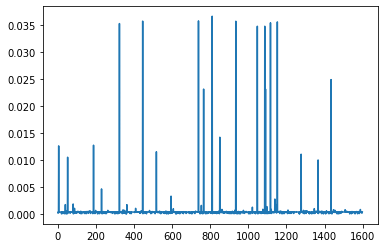

In [ ]:
import matplotlib.pyplot as plt

plt.plot(activeS.gamma_bar)

# EMCM

In [ ]:
# import sys
# sys.path.append("..")

import numpy as np
import cvxpy as cp

#from environment.LinBandit_env import LinBandit_env

class EMCM_Sampling(object):
    
    def __init__(self, env):
        '''
        Constructor
        '''
        self.T = env.T
        self.num_trials = env.num_trials
        self.num_dims = env.num_dims
        self.num_arms = env.num_arms
        self.rec = 1 # record err every rec samples
        self.sample_complexity = []
        self.sigma = env.sigma
        self.theta_star = env.theta_star
        self.sample_complexity = []
        self.X = env.X
        self.delta = env.delta
        self.seed = None
        self.env = env

        self.num_bootstrap = 5
        
        self.esterr = np.zeros((self.num_trials, self.T//self.rec))
        self.armerr = np.zeros((self.num_trials, self.T//self.rec))
        # self.T = self.T * np.ones(self.num_trials)
        
        self.p_emcm = [1.0/self.num_arms for i in range(0,self.num_arms)]
        
    
    

    def reward_func(self, theta, X):
      '''
      exact function at any input theta and x coordinate
      '''
      
      mu_list = []
      for x in X:
        mu_list.append((np.dot(theta,x)))
        # mu_list.append(1.0/(1.0 + np.exp(-1.0*(np.dot(theta,x)))))
      
      return np.array(mu_list)
      

    def residuals(self, theta):
      '''
      function to be optimized
      '''
      

      X_of_pulled_arms = [self.env.X[ind] for ind in self.inds_pulled]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)
    
    def residuals_bootstrap(self, theta):
      '''
      function to be optimized
      '''
      

      X_of_pulled_arms = [self.env.X[ind] for ind in self.bootstrap_samples_arm]
      mus_inds_pulled = self.reward_func(theta, np.array(X_of_pulled_arms))
      

      return (np.array(self.rewards) - np.array(mus_inds_pulled))@np.array(X_of_pulled_arms)

    def find_least_square(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      # rand_start = np.array([0.6 for i in range(self.num_dims)])
      rand_start = np.random.randn(self.env.num_dims)
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln
    
    def find_least_square_bootstrap(self, theta_hat_1 = 0.0):
      '''
      finds theta_hat by optimizing L_{Y^t}(theta)
      '''

      #rand_start = np.random.uniform(0,1)
      #rand_start = 0.7
      # rand_start = np.array([0.6 for i in range(self.num_dims)])
      rand_start = np.random.randn(self.env.num_dims)
      #rand_start = theta_hat_1 = 0.0

      self.opt_soln = least_squares(self.residuals_bootstrap, rand_start)  # second arg is initial guess
      #print("opt sol: ", self.opt_soln)

      return self.opt_soln

    
    def run_EMCM_Sampling(self):

        self.error = np.zeros((self.num_trials, self.T))  
        

        for tr in range(self.num_trials):
            print(tr, end=' ')
            self.seed = tr 
            np.random.seed(tr)
            
            
            A = np.eye(self.num_dims)
            b = np.zeros(self.num_dims)
            

            samples = []
            R = []

            rewards = np.zeros((2, self.num_arms))
            err = np.zeros((2, self.T//self.rec))

            
            theta_hat = np.random.randn(self.num_dims)
            theta_hat_bootstrap = theta_hat

            #print("th: ", theta_hat)
            self.history = []

            self.inds_pulled = []
            self.rewards = []

            # Pull arm twice to initialize
            t = 0
            for s in range(0,2):

              arm = s
              reward = np.dot(self.X[arm], self.theta_star) + self.sigma * np.random.randn()
              
              self.history.append((arm,reward))
              # print(arm, reward)
              samples.append(arm)
              R.append(reward)

              self.inds_pulled.append(arm)
              self.rewards.append(reward)

              rewards[0, samples[s]] += R[s]
              rewards[1, samples[s]] += 1
              A += np.outer(self.X[samples[s]], self.X[samples[s]])
              b += R[s] * self.X[samples[s]]
              t += 1

            # Arbitrary History
            # self.history.append((5,0.05))
            # self.history.append((3,0.0))


            for s in range(t, self.T):

                #arm = np.random.choice(self.num_arms, size = 1, p = self.p_emcm)
                #print(np.shape(self.X), np.shape(theta_hat))
                self.history = np.array(self.history)
                                        
                #bootstrap_samples = self.history[np.random.choice(len(self.history), size = (s,2), p = self.p_emcm)]

                L_x_bootstrap = []
                for b in range(self.num_bootstrap):
                  bootstrap_samples_indices = np.random.choice(len(self.history), size = s)
                  #print(bootstrap_samples_indices)

                  self.bootstrap_samples_arm = self.history[bootstrap_samples_indices,0].astype(int)
                  self.bootstrap_samples_reward = self.history[bootstrap_samples_indices,1]
                  
                  #print(bootstrap_samples_arm, bootstrap_samples_reward)

                  bootstrap_A = np.eye(self.num_dims)
                  bootstrap_b = np.zeros(self.num_dims)
                  bootstrap_A += np.outer(self.X[self.bootstrap_samples_arm[s-1]], self.X[self.bootstrap_samples_arm[s-1]])
                  bootstrap_b += self.bootstrap_samples_reward[s-1] * self.X[self.bootstrap_samples_arm[s-1]]
          
                  
                  #theta_hat_bootstrap = np.linalg.solve(emcm_bootstrap_A, emcm_bootstrap_b)

                  if s%20 == 0:
                    theta_hat_bootstrap = self.find_least_square_bootstrap()["x"]
                  #print(theta_hat_bootstrap)

                  
                  y_plus = [np.dot(theta_hat_bootstrap, self.X[i]) for i in range(self.num_arms)]
                  f_x_plus = [np.dot(theta_hat, self.X[i]) for i in range(self.num_arms)]
                  
                  L_x_plus = [np.linalg.norm((f_x_plus[i] - y_plus[i])*self.X[i]) for i in range(self.num_arms) ]
                  L_x_bootstrap.append(L_x_plus)
                

                L_x_arm_mean = np.mean(L_x_bootstrap, axis = 0)
                #print(L_x_arm_mean)

                arm = np.argmax(L_x_arm_mean)

                
                
                reward = np.dot(self.X[arm], self.theta_star) + self.sigma * np.random.randn()
                # reward = 1.0/(1.0 + np.exp(-np.dot(self.X[arm], self.theta_star))) + self.sigma * np.random.randn()
                
                self.inds_pulled.append(arm)
                self.rewards.append(reward)

                list(self.history).append((arm,reward))

                # print(arm, reward)
                samples.append(arm)
                R.append(reward)


                rewards[0, samples[s]] += R[s]
                rewards[1, samples[s]] += 1
                A += np.outer(self.X[samples[s]], self.X[samples[s]])
                b += R[s] * self.X[samples[s]]
        
                if s % 30:
                  theta_hat = self.find_least_square()["x"]


                err[0, s//self.rec] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                err[1, s//self.rec] = 0
                    
                self.error[tr][s] = np.linalg.norm(theta_hat - self.theta_star, ord=2)
                   
                if s%100 == 0 and s >= 100:
                  print(s, theta_hat, self.theta_star, self.error[tr][s])
                  #print(bootstrap_samples, len(bootstrap_samples))
                if s >= 500:
                  break
                if s%1000 == 0:
                    print(s)
                    
            self.esterr[tr] = err[0]
            self.armerr[tr] = err[1]
            self.sample_complexity.append(samples)



if __name__ == "__main__":
    
    
    
    emcm = EMCM_Sampling(env)
    emcm.run_EMCM_Sampling()




0 

KeyboardInterrupt: ignored

# Plot Proportion

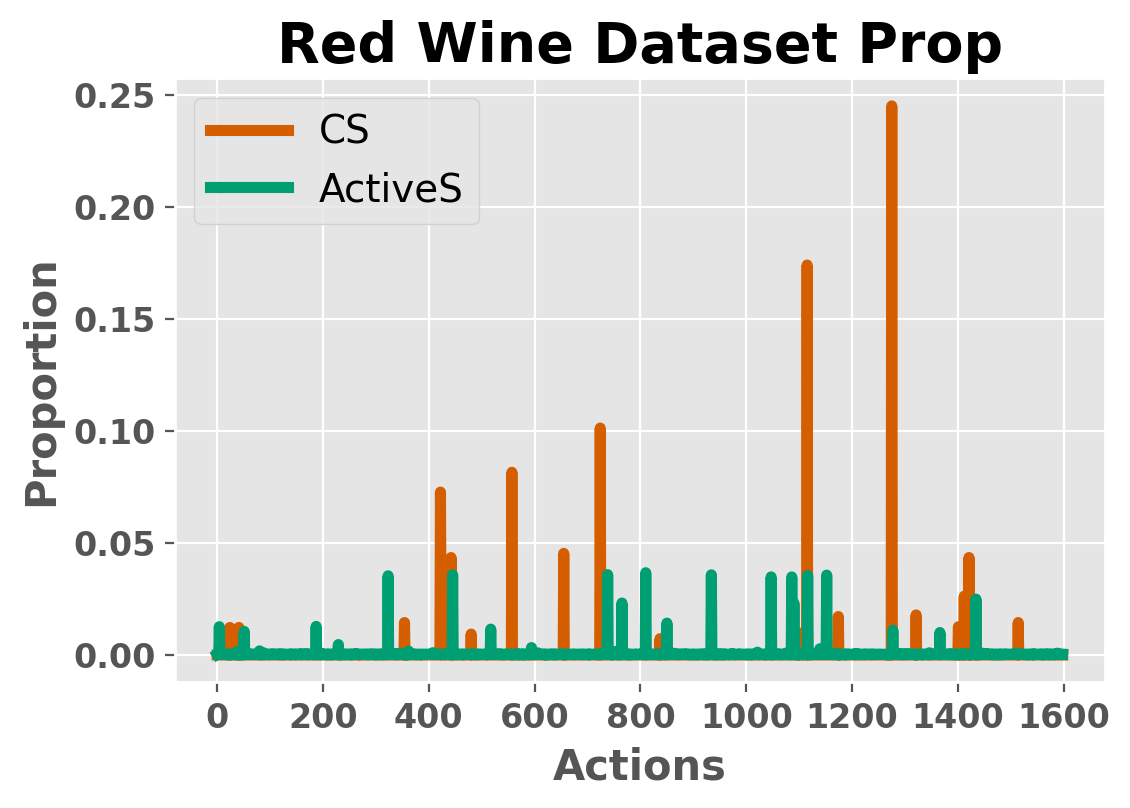

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(dpi=200)


plt.grid(b=True, which='major', linestyle='-')

plt.plot(gen_chern.p_mm, label = "CS", color = '#D55E00', linewidth = 4.0)
plt.plot(activeS.gamma_bar, label = "ActiveS", color = '#009E73', linewidth = 4.0)

plt.title('Red Wine Dataset Prop', size = 20, fontweight='bold')
plt.xticks(size = 12, fontweight='bold')
plt.yticks(size = 12, fontweight='bold')
plt.ylabel('Proportion', fontweight='bold', fontsize = 15)
plt.xlabel('Actions', fontweight='bold', fontsize = 15)

plt.grid(b=True, which='major', linestyle='-')

legend_properties = {'weight':'bold'}
plt.legend(fontsize = 14)

# File Save

In [ ]:
import pickle
file = open("/content/drive/My Drive/AmFamFiles/rlinearReal2", 'wb')

A = gen_chern.error
B = gen_chern_e.error
C = unif.error
D = ogreedy.error
# E = emcm.error
F = activeS.error
# F = glm_top2.error

pickle.dump([A, B, C, D, F],file) # dump information to that file

file.close() # close the file

# File Load

In [ ]:
import pickle 
file = open("/content/drive/My Drive/AmFamFiles/rlinearReal", 'rb')
data = pickle.load(file)
file.close()

gen_chern.error = data[0]
gen_chern_e.error = data[1]
unif.error = data[2]
ogreedy.error = data[3]
# emcm.error = data[3]

activeS.error = data[4]
# glm_top2.error = data[5]


# Plot Error

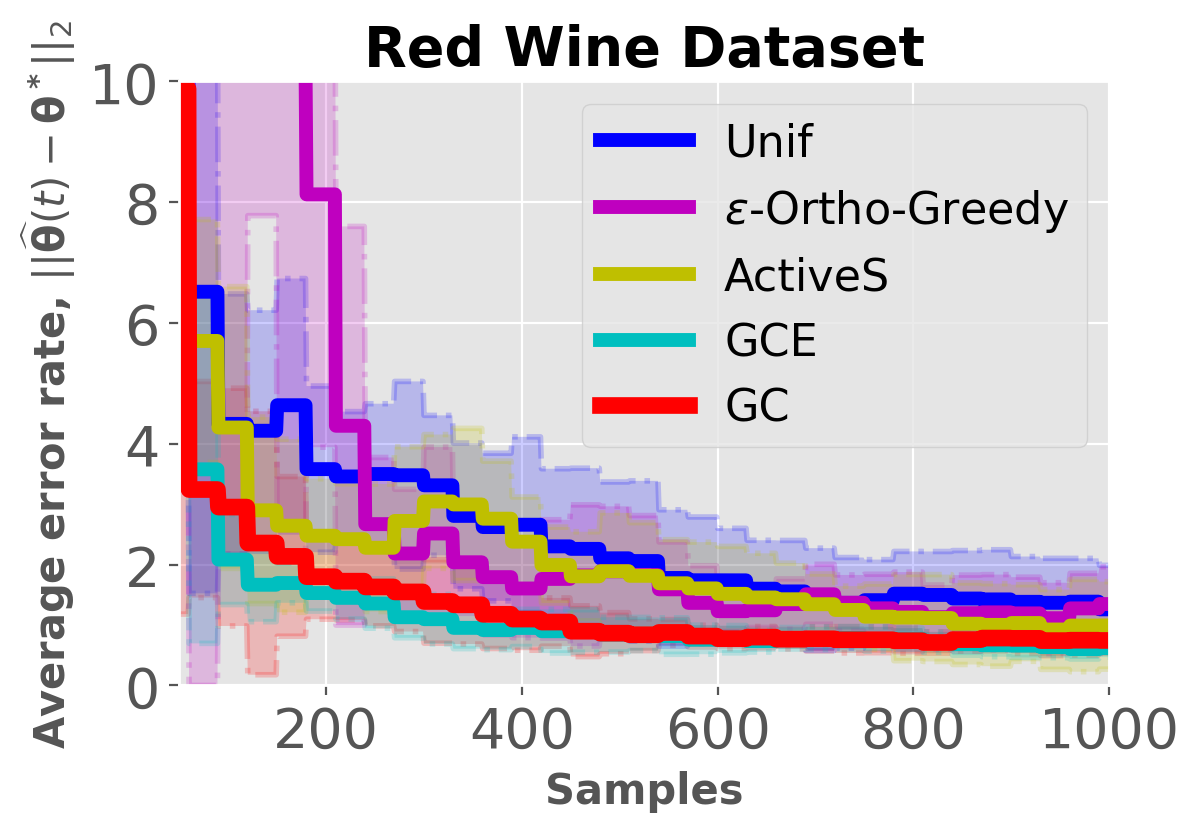

In [ ]:
# plot average errors
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')

#plt.style.use('seaborn-muted')
plt.style.use('ggplot')
plt.figure(dpi=200)


# print(glm_activeS.error, glm_AASL.error)

plt.title('Red Wine Dataset', size = 20, fontweight='bold')


plt.plot(range(env.T), np.average(unif.error, axis=0), color = "b", linewidth = 5.0, label='Unif')
plt.plot(range(env.T), np.average(ogreedy.error, axis=0), color = "m", linewidth = 5.0, label='$\epsilon$-Ortho-Greedy')
# plt.plot(range(env.T), np.average(emcm.error, axis=0), color = "g", linewidth = 5.0, label='EMCM')

plt.plot(range(env.T), np.average(activeS.error, axis=0), color = "y", linewidth = 5.0, label='ActiveS')
plt.plot(range(env.T), np.average(gen_chern_e.error, axis=0), color = "c", linewidth = 5.0, label='GCE')
plt.plot(range(env.T), np.average(gen_chern.error, axis=0), color = "r", linewidth = 6.0, label='GC')

plt.fill_between(range(env.T), np.average(gen_chern.error, axis=0) + np.std(gen_chern.error, axis=0),np.clip(np.average(gen_chern.error, axis=0) - np.std(gen_chern.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="r", facecolor="r", linewidth=2, linestyle='dashdot', antialiased=True)
plt.fill_between(range(env.T), np.average(unif.error, axis=0) + np.std(unif.error, axis=0),np.clip(np.average(unif.error, axis=0) - np.std(unif.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="b", facecolor="b", linewidth=2, linestyle='dashdot', antialiased=True)
plt.fill_between(range(env.T), np.average(ogreedy.error, axis=0) + np.std(ogreedy.error, axis=0),np.clip(np.average(ogreedy.error, axis=0) - np.std(ogreedy.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="m", facecolor="m", linewidth=2, linestyle='dashdot', antialiased=True)
# plt.fill_between(range(env.T), np.average(emcm.error, axis=0) + np.std(emcm.error, axis=0),np.clip(np.average(emcm.error, axis=0) - np.std(emcm.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="g", facecolor="g", linewidth=2, linestyle='dashdot', antialiased=True)

plt.fill_between(range(env.T), np.average(activeS.error, axis=0) + np.std(activeS.error, axis=0),np.clip(np.average(activeS.error, axis=0) - np.std(activeS.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="y", facecolor="y", linewidth=2, linestyle='dashdot', antialiased=True)
plt.fill_between(range(env.T), np.average(gen_chern_e.error, axis=0) + np.std(gen_chern_e.error, axis=0),np.clip(np.average(gen_chern_e.error, axis=0) - np.std(gen_chern_e.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="c", facecolor="c", linewidth=2, linestyle='dashdot', antialiased=True)



legend_properties = {'weight':'bold'}
plt.legend(fontsize = 16)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Average error rate, $\\|\\|\widehat{\mathbf{\\theta}}(t) - \mathbf{\\theta^*}\\|\\|_2$', fontweight='bold', fontsize = 15)
plt.xlabel('Samples', fontweight='bold', fontsize = 15)

plt.ylim(0,10)
#plt.grid()
plt.grid(b=True, which='major', linestyle='-')
plt.xlim(50,1000)
plt.show()

# Plot Error 1

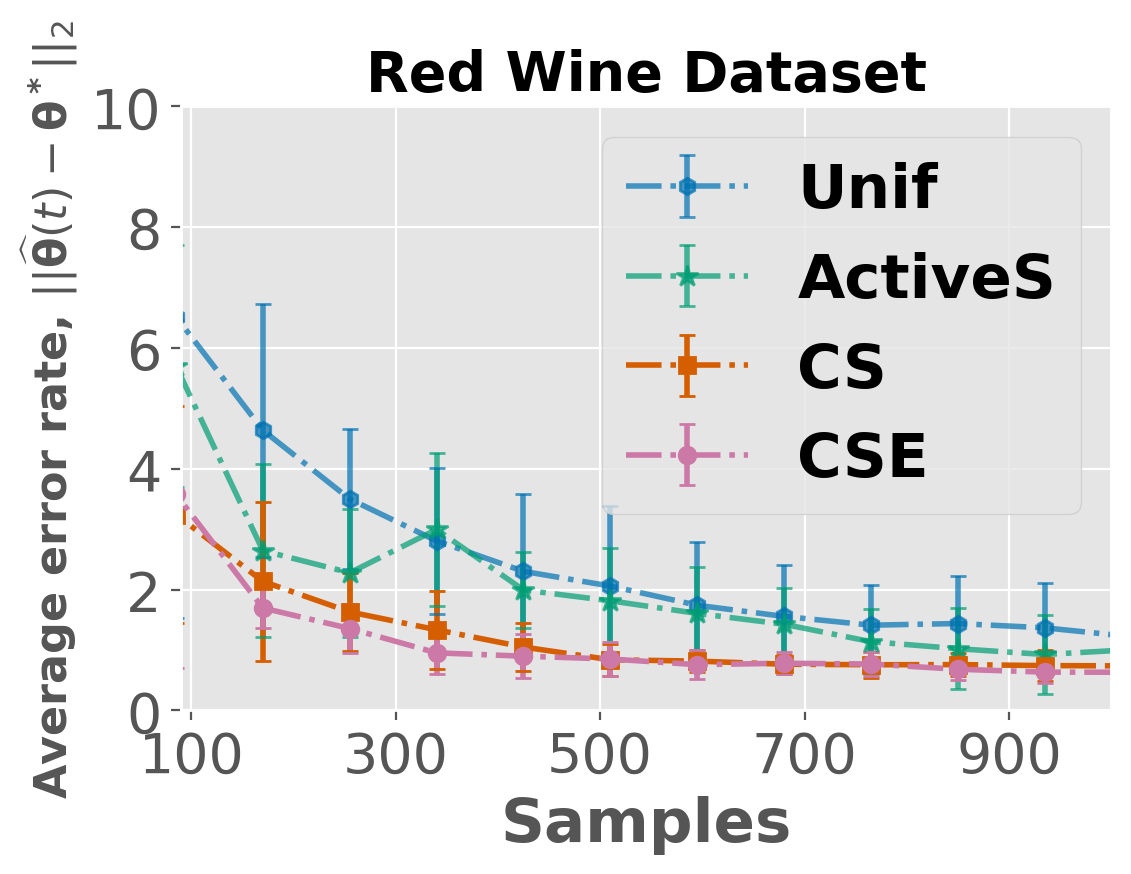

In [ ]:
# plot average errors
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')

#plt.style.use('seaborn-muted')
plt.style.use('ggplot')
plt.figure(dpi=200)


# print(glm_activeS.error, glm_AASL.error)

plt.title('Red Wine Dataset', size = 20, fontweight='bold')

scale = np.arange(0, env.T, 85)

# plt.plot(range(env.T), np.average(unif.error, axis=0), color = "b", linewidth = 0.0, label='Unif')
# plt.plot(range(env.T), np.average(ogreedy.error, axis=0), color = "m", linewidth = 0.0, label='$\epsilon$-Ortho-Greedy')
# plt.plot(range(env.T), np.average(emcm.error, axis=0), color = "g", linewidth = 0.0, label='EMCM')

# plt.plot(range(env.T), np.average(activeS.error, axis=0), color = "y", linewidth = 0.0, label='ActiveS')
# plt.plot(range(env.T), np.average(gen_chern_e.error, axis=0), color = "c", linewidth = 0.0, label='GCE')
# plt.plot(range(env.T), np.average(gen_chern.error, axis=0), color = "r", linewidth = 0.0, label='GC')

# plt.fill_between(range(env.T), np.average(gen_chern.error, axis=0) + np.std(gen_chern.error, axis=0),np.clip(np.average(gen_chern.error, axis=0) - np.std(gen_chern.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="r", facecolor="r", linewidth=2, linestyle='dashdot', antialiased=True)
# plt.fill_between(range(env.T), np.average(unif.error, axis=0) + np.std(unif.error, axis=0),np.clip(np.average(unif.error, axis=0) - np.std(unif.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="b", facecolor="b", linewidth=2, linestyle='dashdot', antialiased=True)
# plt.fill_between(range(env.T), np.average(ogreedy.error, axis=0) + np.std(ogreedy.error, axis=0),np.clip(np.average(ogreedy.error, axis=0) - np.std(ogreedy.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="m", facecolor="m", linewidth=2, linestyle='dashdot', antialiased=True)
# # plt.fill_between(range(env.T), np.average(emcm.error, axis=0) + np.std(emcm.error, axis=0),np.clip(np.average(emcm.error, axis=0) - np.std(emcm.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="g", facecolor="g", linewidth=2, linestyle='dashdot', antialiased=True)

# plt.fill_between(range(env.T), np.average(activeS.error, axis=0) + np.std(activeS.error, axis=0),np.clip(np.average(activeS.error, axis=0) - np.std(activeS.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="y", facecolor="y", linewidth=2, linestyle='dashdot', antialiased=True)
# plt.fill_between(range(env.T), np.average(gen_chern_e.error, axis=0) + np.std(gen_chern_e.error, axis=0),np.clip(np.average(gen_chern_e.error, axis=0) - np.std(gen_chern_e.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="c", facecolor="c", linewidth=2, linestyle='dashdot', antialiased=True)

# plt.errorbar(range(env.T), np.average(gen_chern_e.error, axis=0) + np.std(gen_chern_e.error, axis=0),np.clip(np.average(gen_chern_e.error, axis=0) - np.std(gen_chern_e.error, axis=0), a_min=0, a_max= None), alpha=0.2, edgecolor="c", facecolor="c", linewidth=2, linestyle='dashdot', antialiased=True)



# plt.errorbar(range(env.T), np.average(gen_chern_e.error, axis=0), np.std(gen_chern_e.error, axis=0), linestyle='None', marker='^')


plt.errorbar(scale, [np.average(unif.error, axis=0)[i] for i in scale], [1.0*np.std(unif.error, axis=0)[i] for i in scale], color = "#0072B2", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 0.7, label = "Unif", linestyle = "-.", marker = "h", markersize = 6.0)
# plt.errorbar(scale, [np.average(ogreedy.error, axis=0)[i] for i in scale], [1.0*np.std(ogreedy.error, axis=0)[i] for i in scale], color = "#E69F00", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 0.7, label='$\epsilon$-Ortho-Greedy')
# plt.errorbar(scale, [np.average(emcm.error, axis=0)[i] for i in scale], [1.0*np.std(emcm.error, axis=0)[i] for i in scale], color = "g", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 0.7, label='EMCM')
plt.errorbar(scale, [np.average(activeS.error, axis=0)[i] for i in scale], [1.0*np.std(activeS.error, axis=0)[i] for i in scale], color = "#009E73", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 0.7, label='ActiveS', linestyle = "-.", marker = "*", markersize = 8.0)
plt.errorbar(scale, [np.average(gen_chern.error, axis=0)[i] for i in scale], [1.0*np.std(gen_chern.error, axis=0)[i] for i in scale], color = "#D55E00", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 1.0, label='CS', linestyle = "-.", marker = "s", markersize = 6.0)
plt.errorbar(scale, [np.average(gen_chern_e.error, axis=0)[i] for i in scale], [1.0*np.std(gen_chern_e.error, axis=0)[i] for i in scale], color = "#CC79A7", linewidth = 2, capsize = 3.0, capthick = 1.0, alpha = 1.0, label='CSE', linestyle = "-.", marker = "o", markersize = 6.0)

#"#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2"

legend_properties = {'weight':'bold', 'size':22}
plt.legend(prop = legend_properties)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.ylabel('Average error rate, $\\|\\|\widehat{\mathbf{\\theta}}(t) - \mathbf{\\theta^*}\\|\\|_2$', fontweight='bold', fontsize = 16)
plt.xlabel('Samples', fontweight='bold', fontsize = 22)

plt.ylim(0,10)
#plt.grid()
plt.grid(b=True, which='major', linestyle='-')
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
x_ticks = np.arange(100, env.T, 200)
plt.xticks(x_ticks)
plt.xlim(90,1000)
plt.show()

# Debug

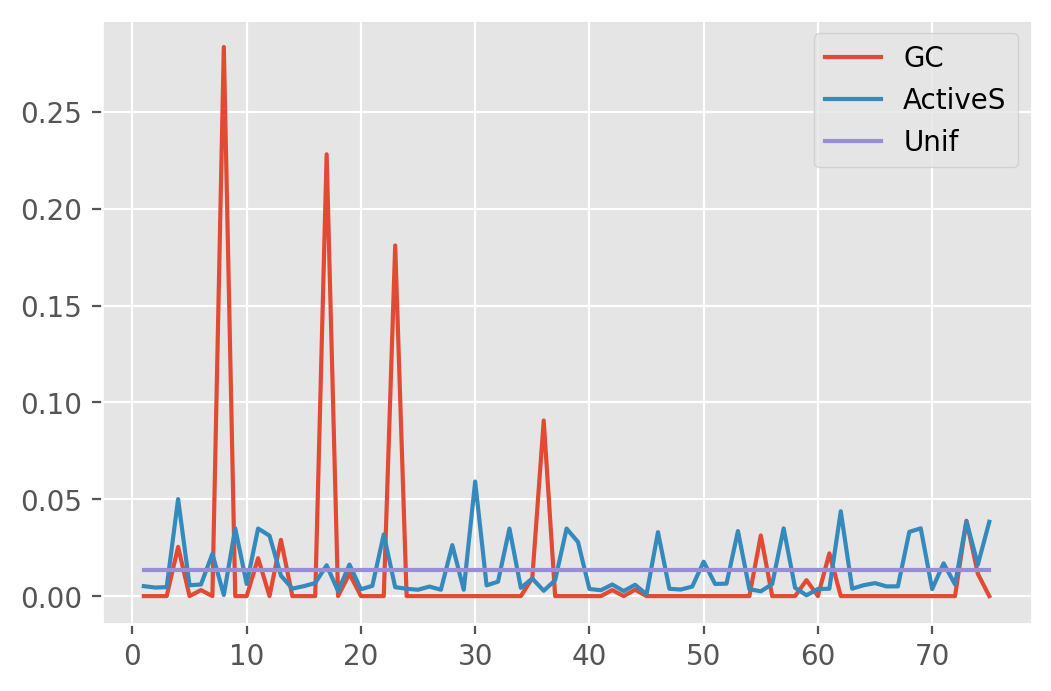

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')

#plt.style.use('seaborn-muted')
plt.style.use('ggplot')
plt.figure(dpi=200)

scale = [i+1 for i in range(env.num_arms)]

plt.plot(scale, gen_chern.p_mm, label = "GC")
plt.plot(scale, activeS.gamma_bar, label = "ActiveS")
plt.plot(scale, unif.p_unif, label = "Unif")

plt.legend()

# plt.xticks(scale)

plt.show()

## trying to find gen-chern sampling pmf

In [ ]:
n1 = len(lines)
n2 = len(lines1)
# data = np.zeros((n1 + n2 - 2, 12))
data = np.zeros((n1 + n2, 12))
m = 0
for i in range(1,n1):
  # print(lines[i])
  x = lines[i].strip().split(";")
  # print(x)
  data[m,:] = [np.around(float(x[i]),3) for i in range(len(x))]
  m += 1


for i in range(1,n2):
  # print(lines1[i])
  # exit(0)
  x = lines1[i].strip().split(";")
  # print(x)
  data[m,:] = [np.around(float(x[i]),3) for i in range(len(x))]
  m += 1



# lines = lines.append(lines1)
# print(lines)
# lines = np.array(lines).reshape()


X = data[:,0:10]
Y = data[:,11]

In [ ]:
import cvxpy as cp

def max_kmin_eig(rows_of_arms, k=1, verbose=False):
    
    p = cp.Variable(rows_of_arms.shape[0], nonneg=True)
    
    prob = cp.Problem(
        cp.Maximize(cp.lambda_sum_smallest(rows_of_arms.T @ cp.diag(p) @ rows_of_arms, k)),
        [cp.sum(p) ==1]
    )
    
    try:
        obj_value = prob.solve(solver='CVXOPT', kktsolver=cp.ROBUST_KKTSOLVER, verbose=verbose)
    except Exception as inst:
        print(inst)
        return False
    
    return p.value, prob.value

In [ ]:
# compute xi @ xi^T
X[0]

array([ 7.4  ,  0.7  ,  0.   ,  1.9  ,  0.076, 11.   , 34.   ,  0.998,
        3.51 ,  0.56 ])

In [ ]:
np.average(X, axis=0)

array([7.21308663e+00, 3.39561471e-01, 3.18535159e-01, 5.44156024e+00,
       5.60166179e-02, 3.05159255e+01, 1.15708955e+02, 9.94394368e-01,
       3.21751039e+00, 5.31104785e-01])

In [ ]:
np.std(X, axis=0)

array([1.30229829e+00, 1.64706255e-01, 1.45391775e-01, 4.75766353e+00,
       3.50393009e-02, 1.77533779e+01, 5.65452632e+01, 1.77044092e-02,
       1.70374314e-01, 1.49063067e-01])

In [ ]:
# preprocess X to have 0 mean and unit variance
proc_X = (X - np.average(X, axis=0)) / np.std(X, axis=0)

In [ ]:
proc_X.T @ proc_X / len(X)

array([[ 1.        ,  0.22134413,  0.32639699, -0.10947873,  0.29939241,
        -0.27833853, -0.32379636,  0.1731238 , -0.20509818,  0.30364164],
       [ 0.22134413,  1.        , -0.37606438, -0.1951176 ,  0.37774378,
        -0.35107547, -0.41263925,  0.08122384,  0.25850884,  0.22765528],
       [ 0.32639699, -0.37606438,  1.        ,  0.14308865,  0.04003205,
         0.13412617,  0.19635198,  0.05465592, -0.29821126,  0.05844889],
       [-0.10947873, -0.1951176 ,  0.14308865,  1.        , -0.12830094,
         0.40321149,  0.4957829 ,  0.11366196, -0.2455194 , -0.18427193],
       [ 0.29939241,  0.37774378,  0.04003205, -0.12830094,  1.        ,
        -0.19403345, -0.27833317,  0.08863069,  0.05145971,  0.39641768],
       [-0.27833853, -0.35107547,  0.13412617,  0.40321149, -0.19403345,
         1.        ,  0.72122433,  0.03434032, -0.1275596 , -0.18611784],
       [-0.32379636, -0.41263925,  0.19635198,  0.4957829 , -0.27833317,
         0.72122433,  1.        ,  0.04120684

In [ ]:
gc, gc_val = max_kmin_eig(proc_X)

In [ ]:
outer_proc_X = np.zeros((10,10,len(proc_X)))

In [ ]:
# Computing outer product for each arm
for i in range(len(proc_X)):
    outer_proc_X[:,:,i] = np.outer(proc_X[i], proc_X[i])

In [ ]:
def gc(outer_prods, k=1, verbose=False):
    
    p = cp.Variable(outer_prods.shape[-1], nonneg=True)

    objective = cp.lambda_sum_smallest(
        sum([p[i] * outer_prods[:,:,i] for i in range(outer_prods.shape[-1])]), 
        k
    )
    
    prob = cp.Problem(cp.Maximize(objective), [cp.sum(p) ==1])
    
    try:
        obj_value = prob.solve(solver='CVXOPT', kktsolver=cp.ROBUST_KKTSOLVER, verbose=verbose)
    except Exception as inst:
        print(inst)
        return False
    
    return p.value, prob.value

In [ ]:
gc, gc_val = gc(outer_proc_X, verbose=True)

     pcost       dcost       gap    pres   dres   k/t
 0: -5.7614e-02 -5.7614e-02  2e+04  8e+01  5e+03  1e+00
 1: -1.6767e+00 -1.6934e+00  3e+03  2e+01  1e+03  2e-01
 2: -2.2111e+00 -2.1582e+00  5e+03  2e+01  1e+03  3e-01
 3: -7.4091e+00 -6.8743e+00  7e+03  1e+01  7e+02  7e-01
 4: -5.2191e+00 -5.1104e+00  2e+03  4e+00  2e+02  2e-01
 5: -3.5494e+00 -3.5303e+00  3e+02  1e+00  6e+01  3e-02
 6: -2.7466e+00 -2.7367e+00  9e+01  5e-01  3e+01  2e-02
 7: -2.5115e+00 -2.5054e+00  4e+01  2e-01  1e+01  9e-03
 8: -2.4420e+00 -2.4394e+00  2e+01  1e-01  6e+00  4e-03
 9: -2.4748e+00 -2.4733e+00  1e+01  7e-02  4e+00  2e-03
10: -2.4831e+00 -2.4826e+00  4e+00  2e-02  1e+00  8e-04
11: -2.4865e+00 -2.4862e+00  3e+00  2e-02  9e-01  5e-04
12: -2.4884e+00 -2.4882e+00  2e+00  1e-02  6e-01  3e-04
13: -2.4944e+00 -2.4944e+00  7e-01  4e-03  2e-01  1e-04
14: -2.4976e+00 -2.4976e+00  2e-01  9e-04  5e-02  3e-05
15: -2.4984e+00 -2.4984e+00  3e-02  2e-04  1e-02  5e-06
16: -2.4986e+00 -2.4986e+00  6e-03  4e-05  2e-03  

In [ ]:
gc_val

2.4986500939423784

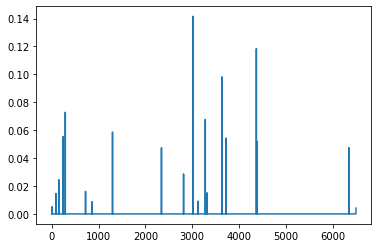

In [ ]:
import matplotlib.pyplot as plt

plt.plot(gc)

In [ ]:
np.save('gc_wine_both.npy', gc)

In [ ]:
np.sum(gc)

1.0000000008731216

In [ ]:
len(gc)

6499